<a href="https://colab.research.google.com/github/ShrieVarshini2004/Machine-Learning-Basics/blob/main/multiclass_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Python script performs classification on the Iris dataset using **Logistic Regression** and **Support Vector Machine (SVM)** while visualizing decision boundaries and class probabilities. The script first imports necessary libraries, including NumPy, Matplotlib, and scikit-learn, and loads the Iris dataset, which consists of three flower species with four features each. The script selects **sepal width and petal width** as the two features for visualization. A **scatter plot** is generated to display the dataset, with different colors representing the three classes. Logistic Regression is then trained on the selected features, and its **class probability predictions** are visualized using a **heatmap**, where each row represents a sample and color intensity indicates confidence in classification. The script also computes the **accuracy of Logistic Regression**, which is expected to be high since training and testing are done on the same dataset. Following this, an **SVM model with a linear kernel** is trained and its accuracy is also calculated. Finally, a **decision boundary plot** is generated to visualize how SVM classifies different regions in the feature space. This script effectively demonstrates how classification models can be trained, evaluated, and visualized in Python using scikit-learn, and it can be improved by introducing a **train-test split**, **cross-validation**, or using all four features instead of two for a more robust analysis.


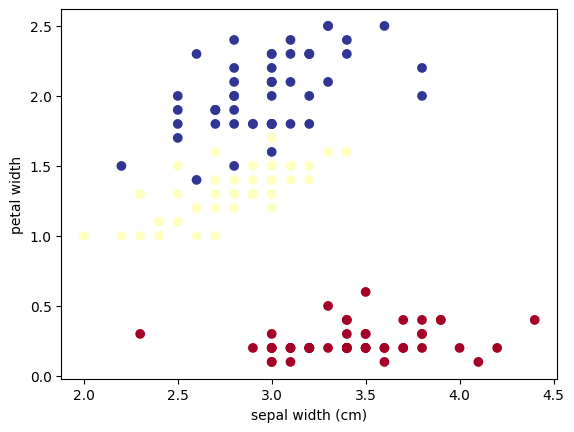

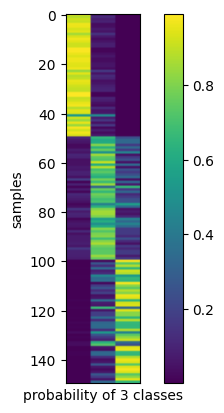

Logistic Regression Accuracy: 1.0
SVM Accuracy: 0.96


<ipython-input-2-6ce97557769c>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


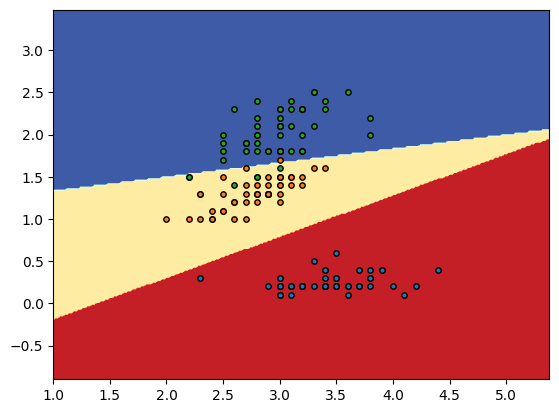

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

plot_colors = "ryb"
plot_step = 0.02

def decision_boundary (X, y, model, iris, two=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    if two:
        plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
        for i, color in zip(np.unique(y), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], cmap=plt.cm.RdYlBu, s=15)
        plt.show()
    else:
        set_ = {0, 1, 2}
        for i, color in zip(range(3), plot_colors):
            idx = np.where(y == i)
            if np.any(idx):
                set_.remove(i)
                plt.scatter(X[idx, 0], X[idx, 1], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

        for i in set_:
            idx = np.where(iris.target == i)
            plt.scatter(X[idx, 0], X[idx, 1], marker='x', color='black')

        plt.show()

def plot_probability_array(X, probability_array):
    plot_array = np.zeros((X.shape[0], 30))
    col_start = 0
    for class_, col_end in enumerate([10, 20, 30]):
        plot_array[:, col_start:col_end] = np.repeat(probability_array[:, class_].reshape(-1, 1), 10, axis=1)
        col_start = col_end
    plt.imshow(plot_array)
    plt.xticks([])
    plt.ylabel("samples")
    plt.xlabel("probability of 3 classes")
    plt.colorbar()
    plt.show()

# Load dataset
iris = datasets.load_iris()

# Define the feature indices correctly
pair = [1, 3]  # Define 'pair' before using it
X = iris.data[:, pair]
y = iris.target

# Scatter plot of the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("sepal width (cm)")
plt.ylabel("petal width")
plt.show()

# Logistic Regression
lr = LogisticRegression(random_state=0).fit(X, y)
probability = lr.predict_proba(X)
plot_probability_array(X, probability)

# Check accuracy
softmax_prediction = np.argmax(probability, axis=1)
yhat = lr.predict(X)
print("Logistic Regression Accuracy:", accuracy_score(yhat, softmax_prediction))

# SVM Model
model = SVC(kernel='linear', gamma=0.5, probability=True)
model.fit(X, y)
yhat = model.predict(X)
print("SVM Accuracy:", accuracy_score(y, yhat))

# Decision boundary visualization
decision_boundary(X, y, model, iris)
